# Healthy Aging

The topic of aging and death is one that pervades conversations and societies alike. Our relationship with death is one of both acceptance and prolonging.

The Department of Health and Human Services have provided the public with a dataset of information collected on human activity and health from 2015 to 2021. I will be analyzing this data to see if I can find any interesting patterns or answer any questions.

In [1]:
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency

import pandas as pd
import numpy as np
import seaborn as sns
import itertools

In [2]:
aging_data = pd.read_csv('Alzheimer_s_Disease_and_Healthy_Aging_Data.csv', encoding='utf-8', low_memory=False)

In [3]:
aging_data.head()

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Response,...,QuestionID,ResponseID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,Report
0,BRFSS~2015~2015~9002~Q43~TOC11~AGE~RACE,2015,2015,MDW,Midwest,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,NaN,...,Q43,NaN,9002,AGE,65PLUS,RACE,NAA,NaN,NaN,NaN
1,BRFSS~2015~2015~66~Q43~TOC11~AGE~GENDER,2015,2015,GU,Guam,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,NaN,...,Q43,NaN,66,AGE,5064,GENDER,FEMALE,NaN,NaN,NaN
2,BRFSS~2015~2015~9002~Q43~TOC11~AGE~RACE,2015,2015,MDW,Midwest,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,NaN,...,Q43,NaN,9002,AGE,AGE_OVERALL,RACE,BLK,NaN,NaN,NaN
3,BRFSS~2015~2015~16~Q27~TMC03~AGE~GENDER,2015,2015,ID,Idaho,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,16,AGE,5064,GENDER,MALE,NaN,NaN,NaN
4,BRFSS~2015~2015~18~Q43~TOC11~AGE~OVERALL,2015,2015,IN,Indiana,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,NaN,...,Q43,NaN,18,AGE,AGE_OVERALL,OVERALL,OVERALL,NaN,NaN,NaN


This is a relatively daunting dataset, but we can work with it pretty well. The important columns to note are the following:

1) YearStart, YearEnd - These columns indicate the year in which that row of data was collected.
2) Class, Topic, Question - These three columns provide more specificity for what a given row of data is measuring.
3) DataValue columns - These columns provide numeric answers (and units) to the questions asked using the above columns.
4) ConfidenceLimit columns - These columns tell us the upper and lower bounds that HHS has set on the "true" answers to the questions asked*. This may be confusing to some readers - I will explain the statistics behind this below.
5) Stratification columns - These columns give demographical specifications for who is being sampled with the question in the row.

**Statistical Explanation for 4)**
In statistics, we often describe upper and lower bounds for the "actual" numeric answer to a question when we're dealing with a sample of answers. This is good for studying the US population because it is difficult to ask every single person we are trying to study within such a large population. As such, we describe the bounds, which come together to form what is known as a Confidence Interval.

Confidence Intervals often come with percentage specifications, which tell us how *confident* we are that the actual answer falls in that *interval*. When the percentage is not given, such as in this data set, it is custom to assume a value of 95%. Thus, we will treat the confidence intervals provided as 95% confidence intervals (CIs). This means that we say with 95% confidence that the true answer falls in the given interval.

The true answer, of course, being the answer for the entire population being studied, as opposed to the data collected, which applies to the sample that was studied.

## Separating Data

As someone who cares significantly about mental health, my first investigation will be into questions of depressing. Furthermore, I'm interested in difference across regions, as that's something that this dataset allows us to measure.

In [4]:
aging_northeast = aging_data[aging_data["LocationAbbr"] == "NRE"]
aging_midwest = aging_data[aging_data["LocationAbbr"] == "MDW"]
aging_south = aging_data[aging_data["LocationAbbr"] == "SOU"]
aging_west = aging_data[aging_data["LocationAbbr"] == "WEST"]

We now have four tables, each separated by region of data collected. The data set also allows you to search a specific state, but I thought that would be a bit too small scale, not to mention unwieldy. Plus, I have a separate personal interest in the Northeast, as someone who's spent my life in various parts of that region.

In [5]:
aging_northeast.head(10)

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Response,...,QuestionID,ResponseID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,Report
19,BRFSS~2015~2015~9001~Q03~TMC01~AGE~RACE,2015,2015,NRE,Northeast,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,NaN,...,Q03,NaN,9001,AGE,5064,RACE,BLK,NaN,NaN,NaN
24,BRFSS~2015~2015~9001~Q08~TOC01~AGE~GENDER,2015,2015,NRE,Northeast,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,NaN,...,Q08,NaN,9001,AGE,65PLUS,GENDER,MALE,NaN,NaN,NaN
31,BRFSS~2015~2015~9001~Q03~TMC01~AGE~RACE,2015,2015,NRE,Northeast,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,NaN,...,Q03,NaN,9001,AGE,5064,RACE,WHT,NaN,NaN,NaN
37,BRFSS~2015~2015~9001~Q43~TOC11~AGE~RACE,2015,2015,NRE,Northeast,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,NaN,...,Q43,NaN,9001,AGE,AGE_OVERALL,RACE,ASN,NaN,NaN,NaN
39,BRFSS~2015~2015~9001~Q35~TOC03~AGE~RACE,2015,2015,NRE,Northeast,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,NaN,...,Q35,NaN,9001,AGE,AGE_OVERALL,RACE,HIS,NaN,NaN,NaN
4099,BRFSS~2015~2015~9001~Q35~TOC03~AGE~RACE,2015,2015,NRE,Northeast,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,NaN,...,Q35,NaN,9001,AGE,5064,RACE,WHT,NaN,NaN,NaN
12698,BRFSS~2015~2015~9001~Q43~TOC11~AGE~RACE,2015,2015,NRE,Northeast,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,NaN,...,Q43,NaN,9001,AGE,AGE_OVERALL,RACE,NAA,NaN,NaN,NaN
18663,BRFSS~2015~2015~9001~Q30~TCC01~AGE~RACE,2015,2015,NRE,Northeast,BRFSS,Cognitive Decline,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,NaN,...,Q30,NaN,9001,AGE,5064,RACE,ASN,NaN,NaN,NaN
18686,BRFSS~2015~2015~9001~Q33~TOC08~AGE~RACE,2015,2015,NRE,Northeast,BRFSS,Overall Health,Self-rated health (good to excellent health),Percentage of older adults who self-reported t...,NaN,...,Q33,NaN,9001,AGE,65PLUS,RACE,ASN,NaN,NaN,NaN
18719,BRFSS~2015~2015~9001~Q45~TOC13~AGE~RACE,2015,2015,NRE,Northeast,BRFSS,Overall Health,Fair or poor health among older adults with ar...,Fair or poor health among older adults with do...,NaN,...,Q45,NaN,9001,AGE,5064,RACE,BLK,NaN,NaN,NaN


Interesting Note: Since this is a study on aging, we have only two age-based stratifications: 50-64 years old, and 65+.

## Sample Question

Just to establish how we're going to go about answer any given question, we're going to start with something very easy, simply measuring lifetime depression diagnosis over time for certain groups. 

In [19]:
aging_nre_depression = aging_northeast[aging_northeast["QuestionID"] == "Q27"]
aging_mdw_depression = aging_midwest[aging_midwest["QuestionID"] == "Q27"]
aging_south_depression = aging_south[aging_south["QuestionID"] == "Q27"]
aging_west_depression = aging_west[aging_west["QuestionID"] == "Q27"]
# Q27: Percentage of older adults with a lifetime diagnosis of depression

In [7]:
aging_nre_depression # Getting a view of one of the above tables

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Response,...,QuestionID,ResponseID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,Report
19936,BRFSS~2015~2015~9001~Q27~TMC03~AGE~RACE,2015,2015,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,65PLUS,RACE,WHT,NaN,NaN,NaN
20357,BRFSS~2015~2015~9001~Q27~TMC03~AGE~RACE,2015,2015,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,5064,RACE,ASN,NaN,NaN,NaN
20473,BRFSS~2015~2015~9001~Q27~TMC03~AGE~GENDER,2015,2015,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,65PLUS,GENDER,FEMALE,NaN,NaN,NaN
20604,BRFSS~2015~2015~9001~Q27~TMC03~AGE~GENDER,2015,2015,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,5064,GENDER,MALE,NaN,NaN,NaN
21788,BRFSS~2015~2015~9001~Q27~TMC03~AGE~RACE,2015,2015,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,65PLUS,RACE,BLK,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236422,BRFSS~2021~2021~9001~Q27~TMC03~AGE~RACE,2021,2021,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,AGE_OVERALL,RACE,WHT,NaN,NaN,NaN
239758,BRFSS~2021~2021~9001~Q27~TMC03~AGE~RACE,2021,2021,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,65PLUS,RACE,BLK,NaN,NaN,NaN
240171,BRFSS~2021~2021~9001~Q27~TMC03~AGE~GENDER,2021,2021,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,AGE_OVERALL,GENDER,MALE,NaN,NaN,NaN
247728,BRFSS~2021~2021~9001~Q27~TMC03~AGE~RACE,2021,2021,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,5064,RACE,HIS,NaN,NaN,NaN


In [8]:
aging_nre_depression.to_csv(r'C:\Important Things\Job Stuff\Projects\aging_nre_depression.csv') # This line of code
                                                                    # creates a CSV file on my computer of the table
                                                                    # above. This allows me to look at it in greater
                                                                    # detail outside of Jupyter.

Upon inspection, some rows in this dataframe will be unusable in any analysis because of a small sample size. As such, we'll want to get rid of them before performing any further action.

In [9]:
aging_nre_depression_final = aging_nre_depression[aging_nre_depression['Data_Value'].notna()] # Drops rows with blank cells
                                                                                              # in the Data_Value column

In [10]:
aging_nre_depression_final

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Response,...,QuestionID,ResponseID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,Report
19936,BRFSS~2015~2015~9001~Q27~TMC03~AGE~RACE,2015,2015,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,65PLUS,RACE,WHT,NaN,NaN,NaN
20473,BRFSS~2015~2015~9001~Q27~TMC03~AGE~GENDER,2015,2015,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,65PLUS,GENDER,FEMALE,NaN,NaN,NaN
20604,BRFSS~2015~2015~9001~Q27~TMC03~AGE~GENDER,2015,2015,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,5064,GENDER,MALE,NaN,NaN,NaN
21788,BRFSS~2015~2015~9001~Q27~TMC03~AGE~RACE,2015,2015,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,65PLUS,RACE,BLK,NaN,NaN,NaN
24528,BRFSS~2015~2015~9001~Q27~TMC03~AGE~RACE,2015,2015,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,AGE_OVERALL,RACE,NAA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236422,BRFSS~2021~2021~9001~Q27~TMC03~AGE~RACE,2021,2021,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,AGE_OVERALL,RACE,WHT,NaN,NaN,NaN
239758,BRFSS~2021~2021~9001~Q27~TMC03~AGE~RACE,2021,2021,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,65PLUS,RACE,BLK,NaN,NaN,NaN
240171,BRFSS~2021~2021~9001~Q27~TMC03~AGE~GENDER,2021,2021,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,AGE_OVERALL,GENDER,MALE,NaN,NaN,NaN
247728,BRFSS~2021~2021~9001~Q27~TMC03~AGE~RACE,2021,2021,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,5064,RACE,HIS,NaN,NaN,NaN


In [11]:
aging_nre_depression_final.to_csv(r'C:\Important Things\Job Stuff\Projects\aging_nre_depression.csv')

Now that we've done this to one set, we can do it with the other 3 before starting further analysis.

In [12]:
aging_mdw_depression_final = aging_mdw_depression[aging_mdw_depression['Data_Value'].notna()]
aging_mdw_depression_final.to_csv(r'C:\Important Things\Job Stuff\Projects\aging_mdw_depression.csv')

aging_south_depression_final = aging_south_depression[aging_south_depression['Data_Value'].notna()]
aging_south_depression_final.to_csv(r'C:\Important Things\Job Stuff\Projects\aging_south_depression.csv')

aging_west_depression_final = aging_west_depression[aging_west_depression['Data_Value'].notna()]
aging_west_depression_final.to_csv(r'C:\Important Things\Job Stuff\Projects\aging_west_depression.csv')

With that done, I now have access to all four depression tables, with the small samples removed. This will allow us to perform some good further analysis.

The date are all stratified by age, and further between race and gender. This means that every row has an age group attached to it, but only one race OR gender.

For simplicity, I'm going to start with gender - mental health has become a more gender-centric topic over the years, so I'm interested to see what results come from this above others. However, we have to pick an age group to sample from - because my focus is on gender, I will be using the "overall" section when it comes to age, rather than picking one group or the other.

In [13]:
aging_nre_depression_final = aging_nre_depression_final[aging_nre_depression_final["StratificationID1"] == "AGE_OVERALL"]

In [14]:
aging_nre_depression_final_male = aging_nre_depression_final[aging_nre_depression_final['StratificationID2'] == "MALE"]
aging_nre_depression_final_female = aging_nre_depression_final[aging_nre_depression_final['StratificationID2'] == "FEMALE"] 

In [15]:
aging_nre_depression_final_male

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Response,...,QuestionID,ResponseID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,Report
25028,BRFSS~2015~2015~9001~Q27~TMC03~AGE~GENDER,2015,2015,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,AGE_OVERALL,GENDER,MALE,NaN,NaN,NaN
55313,BRFSS~2016~2016~9001~Q27~TMC03~AGE~GENDER,2016,2016,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,AGE_OVERALL,GENDER,MALE,NaN,NaN,NaN
95784,BRFSS~2017~2017~9001~Q27~TMC03~AGE~GENDER,2017,2017,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,AGE_OVERALL,GENDER,MALE,NaN,NaN,NaN
127137,BRFSS~2018~2018~9001~Q27~TMC03~AGE~GENDER,2018,2018,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,AGE_OVERALL,GENDER,MALE,NaN,NaN,NaN
165625,BRFSS~2019~2019~9001~Q27~TMC03~AGE~GENDER,2019,2019,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,AGE_OVERALL,GENDER,MALE,NaN,NaN,NaN
173430,BRFSS~2020~2020~9001~Q27~TMC03~AGE~GENDER,2020,2020,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,AGE_OVERALL,GENDER,MALE,NaN,NaN,NaN
240171,BRFSS~2021~2021~9001~Q27~TMC03~AGE~GENDER,2021,2021,NRE,Northeast,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,9001,AGE,AGE_OVERALL,GENDER,MALE,NaN,NaN,NaN


We've finally figured out a series of steps to curate our data down to something we can graph. Now we can form it into a list.

In [16]:
male_depression_all_ages = []
for index, row in aging_nre_depression_final_male.iterrows():
    male_depression_all_ages.append(row["Data_Value"])

In [17]:
female_depression_all_ages = []
for index, row in aging_nre_depression_final_female.iterrows():
    female_depression_all_ages.append(row["Data_Value"])

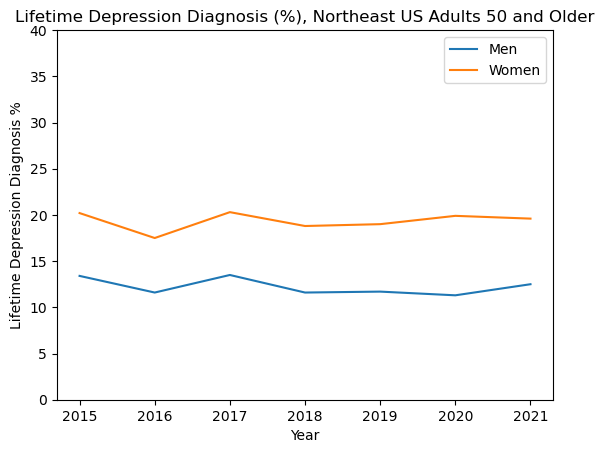

In [18]:
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
plt.plot(years, male_depression_all_ages)
plt.plot(years, female_depression_all_ages)
plt.ylim(0, 40)
plt.title("Lifetime Depression Diagnosis (%), Northeast US Adults 50 and Older")
plt.xlabel("Year")
plt.ylabel("Lifetime Depression Diagnosis %")
plt.legend(["Men", "Women"])

As we can see, male depression diagnosis is maintained between 10 and 15 percent, whereas women are hovering around 20%.

## Deeper Analysis

Now that we've gotten an idea of how we want to chop up our data for analysis, we can ask and answer more complex questions. The first curiosity that comes to mind for me is a potential comparison between depression and unhealthy weight.

Since we already have databases curated for depression, we will now make some for obesity.

In [20]:
aging_nre_obesity = aging_northeast[aging_northeast["QuestionID"] == "Q13"] 
aging_mdw_obesity = aging_midwest[aging_midwest["QuestionID"] == "Q13"]
aging_south_obesity = aging_south[aging_south["QuestionID"] == "Q13"]
aging_west_obesity = aging_west[aging_west["QuestionID"] == "Q13"]
# Q13: Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more

I also want to compare region to region for this question now that we've left example territory. 

In [22]:
aging_nre_obesity_final = aging_nre_obesity[aging_nre_obesity['Data_Value'].notna()]
aging_nre_obesity_final.to_csv(r'C:\Important Things\Job Stuff\Projects\aging_nre_obesity.csv')

aging_mdw_obesity_final = aging_mdw_obesity[aging_mdw_obesity['Data_Value'].notna()]
aging_mdw_obesity_final.to_csv(r'C:\Important Things\Job Stuff\Projects\aging_mdw_obesity.csv')

aging_south_obesity_final = aging_south_obesity[aging_south_obesity['Data_Value'].notna()]
aging_south_obesity_final.to_csv(r'C:\Important Things\Job Stuff\Projects\aging_south_obesity.csv')

aging_west_obesity_final = aging_west_obesity[aging_west_obesity['Data_Value'].notna()]
aging_west_obesity_final.to_csv(r'C:\Important Things\Job Stuff\Projects\aging_west_obesity.csv')

I'm still not particularly interested in separating by age group, so I will be filtering down to all ages for each of these.

In [23]:
aging_mdw_depression_final = aging_mdw_depression_final[aging_mdw_depression_final["StratificationID1"] == "AGE_OVERALL"]
aging_south_depression_final = aging_south_depression_final[aging_south_depression_final["StratificationID1"] == "AGE_OVERALL"]
aging_west_depression_final = aging_west_depression_final[aging_west_depression_final["StratificationID1"] == "AGE_OVERALL"]

aging_nre_obesity_final = aging_nre_obesity_final[aging_nre_obesity_final["StratificationID1"] == "AGE_OVERALL"]
aging_mdw_obesity_final = aging_mdw_obesity_final[aging_mdw_obesity_final["StratificationID1"] == "AGE_OVERALL"]
aging_south_obesity_final = aging_south_obesity_final[aging_south_obesity_final["StratificationID1"] == "AGE_OVERALL"]
aging_west_obesity_final = aging_west_obesity_final[aging_west_obesity_final["StratificationID1"] == "AGE_OVERALL"]

We now have eight tables, four for depression and four for obesity - all using solely "all ages" for our age group.

We now have to decide what to do about our second stratification; we could use race or gender. For now we will stick to gender, as we have a gender stratification in place from our example. Starting with gender only will allow us to build on our previous results - having the previous tables allows us to quickly create templates for our other tables.

In [25]:
# aging_nre_depression_final_male
# aging_nre_depression_final_female

aging_nre_obesity_final_male = aging_nre_obesity_final[aging_nre_obesity_final['StratificationID2'] == "MALE"]
aging_nre_obesity_final_female = aging_nre_obesity_final[aging_nre_obesity_final['StratificationID2'] == "FEMALE"]

aging_mdw_depression_final_male = aging_mdw_depression_final[aging_mdw_depression_final['StratificationID2'] == "MALE"]
aging_mdw_depression_final_female = aging_mdw_depression_final[aging_mdw_depression_final['StratificationID2'] == "FEMALE"] 

aging_mdw_obesity_final_male = aging_mdw_obesity_final[aging_mdw_obesity_final['StratificationID2'] == "MALE"]
aging_mdw_obesity_final_female = aging_mdw_obesity_final[aging_mdw_obesity_final['StratificationID2'] == "FEMALE"]

aging_south_depression_final_male = aging_south_depression_final[aging_south_depression_final['StratificationID2'] == "MALE"]
aging_south_depression_final_female = aging_south_depression_final[aging_south_depression_final['StratificationID2'] == "FEMALE"] 

aging_south_obesity_final_male = aging_south_obesity_final[aging_south_obesity_final['StratificationID2'] == "MALE"]
aging_south_obesity_final_female = aging_south_obesity_final[aging_south_obesity_final['StratificationID2'] == "FEMALE"]

aging_west_depression_final_male = aging_west_depression_final[aging_west_depression_final['StratificationID2'] == "MALE"]
aging_west_depression_final_female = aging_west_depression_final[aging_west_depression_final['StratificationID2'] == "FEMALE"] 

aging_west_obesity_final_male = aging_west_obesity_final[aging_west_obesity_final['StratificationID2'] == "MALE"]
aging_west_obesity_final_female = aging_west_obesity_final[aging_west_obesity_final['StratificationID2'] == "FEMALE"]

### Depression/Obesity - Lists and Graphs